<a href="https://colab.research.google.com/github/MPGarg/TSCAI2.5/blob/main/Pytorch_101_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import important libraries
import torch
import torchvision # provide access to datasets, models, transforms, utils, etc
import torchvision.transforms as transforms

In [2]:
from torch.utils.data import Dataset

In [3]:
# Download Mnist data
train_set_mnist = torchvision.datasets.MNIST(
    root='./data'
    ,train=True
    ,download=True
    ,transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ])
)

test_set_mnist = torchvision.datasets.MNIST(
    root='./data'
    ,train=False
    ,download=True
    ,transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ])
)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [4]:
#create loader for testing
train_loader_mnist = torch.utils.data.DataLoader(
    train_set_mnist, 
    batch_size=32,
    shuffle=True
)

In [5]:
#set width to print
import numpy as np
import matplotlib.pyplot as plt

torch.set_printoptions(linewidth=120)

In [6]:
len(train_set_mnist), len(test_set_mnist)

(60000, 10000)

In [7]:
#distribution of data in MNIST
train_set_mnist.targets.bincount(), test_set_mnist.targets.bincount()

(tensor([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]),
 tensor([ 980, 1135, 1032, 1010,  982,  892,  958, 1028,  974, 1009]))

labels: tensor([6, 4, 6, 9, 7, 7, 2, 9, 1, 9, 4, 0, 8, 8, 3, 5, 6, 3, 7, 9, 7, 6, 9, 1, 6, 4, 8, 5, 6, 6, 3, 6])


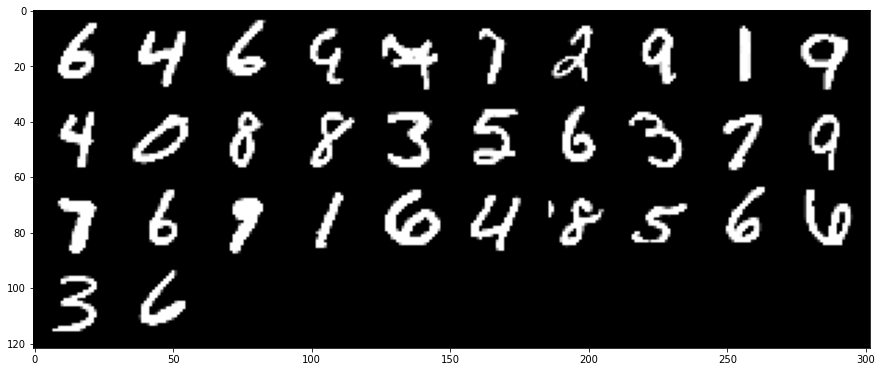

In [8]:
#printing batch
batch = next(iter(train_loader_mnist))
images, labels = batch
grid = torchvision.utils.make_grid(images, nrow=10)
plt.figure(figsize=(15,15))
plt.imshow(np.transpose(grid, (1,2,0)))
print('labels:', labels)

In [9]:
#creating dataset of Random Numbers + MNIST = RandomNo_MNIST
from torch.utils.data import Dataset
import torch.nn.functional as F
import torch.optim as optim

class RandomNo_MNIST(Dataset):
  def __init__(self, imageset):
    self.imageset = imageset

  def __getitem__(self, index):
    rand_no_label = torch.randint(0, 10, (1,))            #number from 0 to 9
    rand_no = F.one_hot(rand_no_label, num_classes=10)    #one hot encoding to be concatenated later
    return { "image": self.imageset[index][0], 
              "number": rand_no,
              "label_image": self.imageset[index][1],
              "label_num": rand_no_label }      
           #returning encoded data & label

  def __len__(self):
    return len(self.imageset)

In [10]:
#Instantiate Train & test classes
randNo_train = RandomNo_MNIST(train_set_mnist)
randNo_test = RandomNo_MNIST(test_set_mnist)

len(randNo_train), len(randNo_test)

(60000, 10000)

In [11]:
#for checking loader
train_loader_rand = torch.utils.data.DataLoader(
    randNo_train, 
    batch_size = 2, 
    shuffle=True
)

In [12]:
#print 1 batch
for v in train_loader_rand:
  print(v)
  break

{'image': tensor([[[[-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          ...,
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242]]],


        [[[-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          ...,
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242]]]]), 'number': tensor([[[0, 0, 0, 0, 0, 0, 1, 0, 0, 0]],

        [[0, 1, 0, 0, 0, 0, 0, 0, 0

In [13]:
#get correct values
def get_num_correct(preds, labels):
  return preds.argmax(dim=1).eq(labels).sum().item()

In [14]:
#Set CUDA if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [15]:
#create model
import torch.nn as nn
class Network(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3)       
    self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3)      
    self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3)     
    self.conv4 = nn.Conv2d(in_channels=128, out_channels=512, kernel_size=3)    
    self.conv5 = nn.Conv2d(in_channels=512, out_channels=256, kernel_size=3)    
    self.conv6 = nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3)    
    self.fc1 = nn.Linear(in_features=512 * 3 * 3, out_features=60)
    self.out = nn.Linear(in_features=60, out_features=10)
    self.fc2 = nn.Linear(in_features=20, out_features=100)
    self.out2 = nn.Linear(in_features=100, out_features=19)
    
  def forward(self, t1, t2):          #input has 2 dataset
    # input layer
    x1 = t1
    # conv1 layer
    x1 = self.conv1(x1) # 28 -> 26 RF 3 In_Ch: 1  Out_Ch: 32
    x1 = F.relu(x1)
    x1 = self.conv2(x1) # 26 -> 24 RF 5 In_Ch: 32 Out_Ch: 64
    x1 = F.relu(x1)
    x1 = self.conv3(x1) # 24 > 22 RF 7  In_Ch: 64 Out_Ch: 128
    x1 = F.relu(x1)
    x1 = self.conv4(x1) # 22 > 20 RF 9  In_Ch: 128 Out_Ch: 512
    x1 = F.relu(x1)
    x1 = F.max_pool2d(x1, kernel_size=2, stride=2) # 20 > 10 RF 18 (assumption)
    x1 = self.conv5(x1) # 10 > 8 RF 20  In_Ch: 512 Out_Ch: 256
    x1 = F.relu(x1)
    x1 = self.conv6(x1) # 8 > 6 RF 22   In_Ch: 256 Out_Ch: 512
    x1 = F.relu(x1)
    x1 = F.max_pool2d(x1, kernel_size=2, stride=2) # 6 > 3 RF 44 (assumption)
    # reshapre
    x1 = x1.reshape(-1, 512 * 3 * 3)  #512 Channel & 3x3 output
    # fc1 layer
    x1 = self.fc1(x1)                 #FC Layer Output: 60
    x1 = F.relu(x1)
    # output layer for MNIST
    x1 = self.out(x1)                 #FC Layer Output: 10 (same as MNIST Classes)
    #predict class to be used as Input for SUM; one hot encoding for predicted number
    pred_cl_one = F.one_hot(torch.argmax(x1,dim=1), num_classes=10) 
    #concatenate first output & second input (we are using same batch number for both to be able to concatenate)
    x2 = torch.cat((pred_cl_one,t2), dim=1) #concatenate second input t2 & predicted class of t1
    x2 = x2.to(torch.float32)               #change dtype to allow data to pass to FC2
    x2 = self.fc2(x2)                       #Passing to FC layer Output: 100
    x2 = F.relu(x2)
    # output layer for SUM
    x2 = self.out2(x2)                      #Out layer for second input 100 & output: 19 (sum 0 to 18)
    return x1, x2                           #return both output

In [16]:
#run as test complete network
network = Network()
network.to(device)

#batch size as 128
train_loader_rand = torch.utils.data.DataLoader(
    randNo_train, 
    batch_size=128,
    shuffle=True
)

#batch size as 128
test_loader_rand = torch.utils.data.DataLoader(
    randNo_test, 
    batch_size = 128, 
    shuffle=True
)

#optimizer as Adam
optimizer = optim.Adam(network.parameters(), lr=0.001)

total_loss_mnist = 0
total_correct_mnist = 0
total_loss_sum = 0
total_correct_sum = 0

for batch in train_loader_rand: # Get Batch of image
    images = batch['image'].to(device)                    #push data to GPU
    labels_mnist = batch['label_image'].to(device) 
    randNum = batch['number'].to(device)
    labels_ranNo = batch['label_num'].reshape(1,-1)
    labels_ranNo= labels_ranNo.to(device)
    preds_mnist, preds_sum = network(images,randNum.squeeze(1))      # Pass data to Network
    labels_mnist = labels_mnist.to(device)
    labels_ranNo = labels_ranNo.to(device)
    labels_sum = labels_mnist + labels_ranNo              #creating labels for Sum
    labels_sum = labels_sum.to(device)
    loss_mnist = F.cross_entropy(preds_mnist, labels_mnist) # Calculate Loss for MNIST
    loss_ranNo = F.cross_entropy(preds_sum, labels_sum.reshape(-1)) # Calculate Loss for Sum 

    loss = loss_mnist + loss_ranNo    #Total loss
    optimizer.zero_grad()             
    loss.backward()
    optimizer.step() # Update Weights

    #calculating loss and correct prediction
    total_loss_mnist += loss_mnist.item()
    total_correct_mnist += get_num_correct(preds_mnist, labels_mnist)
    total_loss_sum += loss_ranNo.item()
    total_correct_sum += get_num_correct(preds_sum, labels_sum)

print(
    "epoch:", 0, 
    "Train tot_corr MNIST:", total_correct_mnist / len(randNo_train) *100, 
    "Train loss MNIST:", total_loss_mnist,
    "Train tot_corr Sum:", total_correct_sum / len(randNo_train) *100, 
    "Train loss Sum:", total_loss_sum    
)

total_loss_mnist_test = 0
total_correct_mnist_test = 0
total_loss_sum_test = 0
total_correct_sum_test = 0

with torch.no_grad():
  for batch in test_loader_rand: # Get Batch of image
      images = batch['image'].to(device)                    #push data to GPU
      labels_mnist = batch['label_image'].to(device) 
      randNum = batch['number'].to(device)
      labels_ranNo = batch['label_num'].reshape(1,-1)
      labels_ranNo= labels_ranNo.to(device)
      preds_mnist, preds_sum = network(images,randNum.squeeze(1))      # Pass data to Network
      labels_mnist = labels_mnist.to(device)
      labels_ranNo = labels_ranNo.to(device)
      labels_sum = labels_mnist + labels_ranNo              #creating labels for Sum
      labels_sum = labels_sum.to(device)
      loss_mnist = F.cross_entropy(preds_mnist, labels_mnist) # Calculate Loss for MNIST
      loss_ranNo = F.cross_entropy(preds_sum, labels_sum.reshape(-1)) # Calculate Loss for Sum 
    
      #calculating loss and correct prediction
      total_loss_mnist_test += loss_mnist.item()
      total_correct_mnist_test += get_num_correct(preds_mnist, labels_mnist)
      total_loss_sum_test += loss_ranNo.item()
      total_correct_sum_test += get_num_correct(preds_sum, labels_sum)

print(
    "epoch:", 0, 
    "Test tot_corr MNIST:", total_correct_mnist_test / len(randNo_test) * 100, 
    "Test loss MNIST:", total_loss_mnist_test,
    "Test tot_corr Sum:", total_correct_sum_test / len(randNo_test) * 100, 
    "Test loss Sum:", total_loss_sum_test    
)

epoch: 0 Train tot_corr MNIST: 93.62 Train loss MNIST: 90.72680276888423 Train tot_corr Sum: 65.36 Train loss Sum: 838.2204705476761
epoch: 0 Test tot_corr MNIST: 98.83 Test loss MNIST: 2.9376594118075445 Test tot_corr Sum: 98.83 Test loss Sum: 49.446833074092865


In [18]:
#running multiple epochs for training network
network = Network()
network.to(device)

#batch size as 128
train_loader_rand = torch.utils.data.DataLoader(
    randNo_train, 
    batch_size=128,
    shuffle=True
)

#batch size as 128
test_loader_rand = torch.utils.data.DataLoader(
    randNo_test, 
    batch_size = 128, 
    shuffle=True
)

optimizer = optim.Adam(network.parameters(), lr=0.001)

for epoch in range(10):
    total_loss_mnist = 0
    total_correct_mnist = 0
    total_loss_sum = 0
    total_correct_sum = 0

    for batch in train_loader_rand: # Get Batch of image
        images = batch['image'].to(device)                    #push data to GPU
        labels_mnist = batch['label_image'].to(device) 
        randNum = batch['number'].to(device)
        labels_ranNo = batch['label_num'].reshape(1,-1)
        labels_ranNo= labels_ranNo.to(device)
        preds_mnist, preds_sum = network(images,randNum.squeeze(1))      # Pass data to Network
        labels_mnist = labels_mnist.to(device)
        labels_ranNo = labels_ranNo.to(device)
        labels_sum = labels_mnist + labels_ranNo              #creating labels for Sum
        labels_sum = labels_sum.to(device)
        loss_mnist = F.cross_entropy(preds_mnist, labels_mnist) # Calculate Loss for MNIST
        loss_ranNo = F.cross_entropy(preds_sum, labels_sum.reshape(-1)) # Calculate Loss for Sum 

        loss = loss_mnist + loss_ranNo    #Total loss
        optimizer.zero_grad()             
        loss.backward()
        optimizer.step() # Update Weights

        #calculating loss and correct prediction
        total_loss_mnist += loss_mnist.item()
        total_correct_mnist += get_num_correct(preds_mnist, labels_mnist)
        total_loss_sum += loss_ranNo.item()
        total_correct_sum += get_num_correct(preds_sum, labels_sum)

    print(
        f"Epoch: {epoch + 1}  \
          Training MNIST Accuracy: {total_correct_mnist / len(randNo_train) : .2%} \
          MNIST Loss: {total_loss_mnist: .4f}  \
          Sum Accuracy: {total_correct_sum / len(randNo_train) : .2%} \
          Sum Loss: {total_loss_sum: .4f}"
    )

Epoch: 1            Training MNIST Accuracy:  93.92%           MNIST Loss:  88.9746            Sum Accuracy:  62.77%           Sum Loss:  847.2251
Epoch: 2            Training MNIST Accuracy:  98.67%           MNIST Loss:  20.8842            Sum Accuracy:  98.67%           Sum Loss:  138.6351
Epoch: 3            Training MNIST Accuracy:  99.03%           MNIST Loss:  15.3731            Sum Accuracy:  99.03%           Sum Loss:  53.5789
Epoch: 4            Training MNIST Accuracy:  99.22%           MNIST Loss:  11.5986            Sum Accuracy:  99.22%           Sum Loss:  36.9294
Epoch: 5            Training MNIST Accuracy:  99.41%           MNIST Loss:  9.3300            Sum Accuracy:  99.41%           Sum Loss:  27.5376
Epoch: 6            Training MNIST Accuracy:  99.48%           MNIST Loss:  7.9085            Sum Accuracy:  99.48%           Sum Loss:  23.6157
Epoch: 7            Training MNIST Accuracy:  99.51%           MNIST Loss:  6.8891            Sum Accuracy:  99.51%         

In [19]:
#Validate Model on test data
total_loss_mnist_test = 0
total_correct_mnist_test = 0
total_loss_sum_test = 0
total_correct_sum_test = 0

with torch.no_grad():
  for batch in test_loader_rand: # Get Batch of image
      images = batch['image'].to(device)                    #push data to GPU
      labels_mnist = batch['label_image'].to(device) 
      randNum = batch['number'].to(device)
      labels_ranNo = batch['label_num'].reshape(1,-1)
      labels_ranNo= labels_ranNo.to(device)
      preds_mnist, preds_sum = network(images,randNum.squeeze(1))      # Pass data to Network
      labels_mnist = labels_mnist.to(device)
      labels_ranNo = labels_ranNo.to(device)
      labels_sum = labels_mnist + labels_ranNo              #creating labels for Sum
      labels_sum = labels_sum.to(device)
      loss_mnist = F.cross_entropy(preds_mnist, labels_mnist) # Calculate Loss for MNIST
      loss_ranNo = F.cross_entropy(preds_sum, labels_sum.reshape(-1)) # Calculate Loss for Sum 
    
      #calculating loss and correct prediction
      total_loss_mnist_test += loss_mnist.item()
      total_correct_mnist_test += get_num_correct(preds_mnist, labels_mnist)
      total_loss_sum_test += loss_ranNo.item()
      total_correct_sum_test += get_num_correct(preds_sum, labels_sum)

print(
    f"Test MNIST Accuracy: {total_correct_mnist_test / len(randNo_test) : .2%} \
      MNIST Loss: {total_loss_mnist_test: .4f}  \
      Sum Accuracy: {total_correct_sum_test / len(randNo_test) : .2%} \
      Sum Loss: {total_loss_sum_test: .4f}"
)

Test MNIST Accuracy:  99.21%       MNIST Loss:  2.2169        Sum Accuracy:  99.21%       Sum Loss:  5.1394
